In [60]:
%reset -f
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [61]:
df = pd.read_csv('dataset/SAheart.csv')
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [62]:
df.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [63]:
# 1.	How many records are present in the dataset? Print the metadata information of the dataset.
record_count = df.shape[0]
print(f"Number of records: {record_count}")
print("Metadata Information:")
df.info()


Number of records: 462
Metadata Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 36.2+ KB


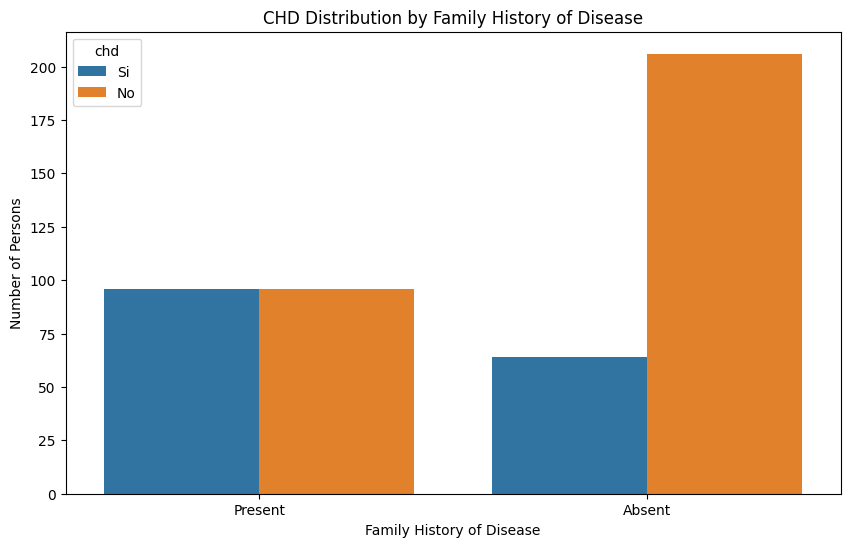

In [64]:
# 2.	Draw a bar plot to show the number of persons having CHD or not in comparison to their family history of the disease or not.
plt.figure(figsize=(10, 6))
sns.countplot(x='famhist', hue='chd', data=df)
plt.title('CHD Distribution by Family History of Disease')
plt.xlabel('Family History of Disease')
plt.ylabel('Number of Persons')
plt.show()


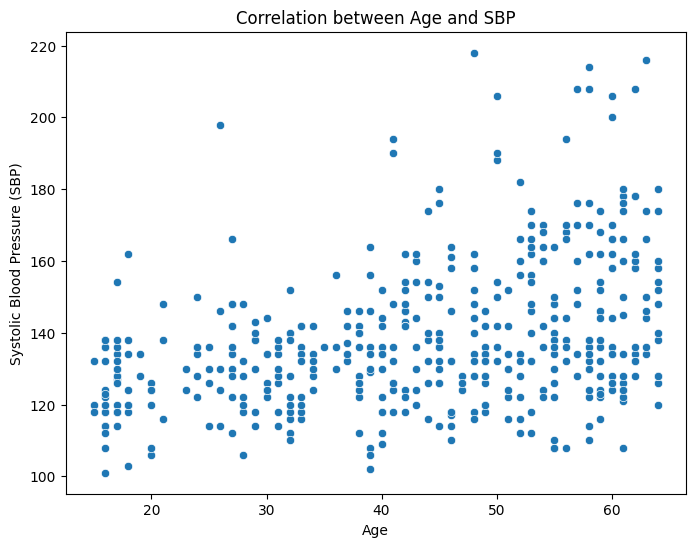

In [65]:
# 3.	Does age have any correlation with sbp? Choose an appropriate plot to show the relationship.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='sbp', data=df)
plt.title('Correlation between Age and SBP')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure (SBP)')
plt.show()



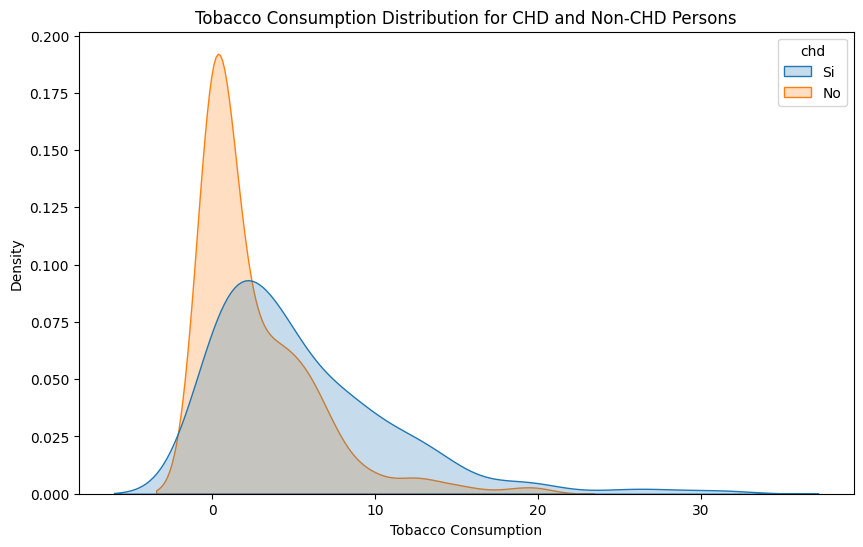

In [66]:
# 4.	Compare the distribution of tobacco consumption for persons having CHD and not having CHD. 
# Can you interpret the effect of tobacco consumption on having coronary heart disease?

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="tobacco", hue="chd", fill=True, common_norm=False)
plt.title('Tobacco Consumption Distribution for CHD and Non-CHD Persons')
plt.xlabel('Tobacco Consumption')
plt.ylabel('Density')
plt.show()



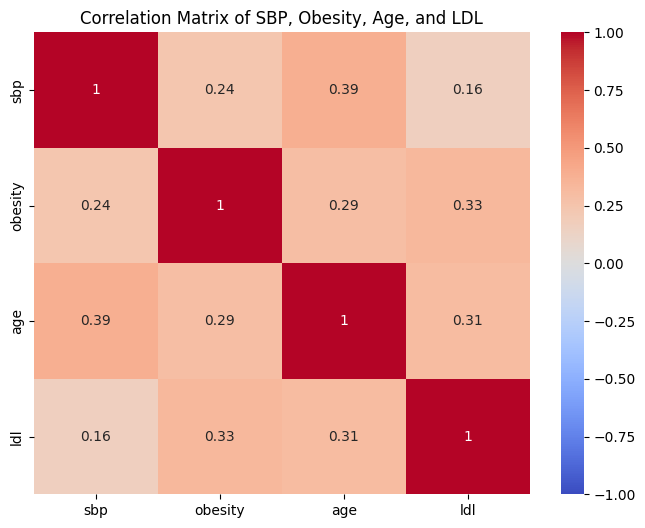

In [67]:
# 5.	How are the parameters sbp, obesity, age, and ldl correlated? Choose the right plot to show the relationships.
plt.figure(figsize=(8, 6))
correlation_matrix = df[['sbp', 'obesity', 'age', 'ldl']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of SBP, Obesity, Age, and LDL')
plt.show()



In [68]:
# 6.	Derive a new column called agegroup from the age column where persons falling in different age ranges are categorized as below:
# 	•	(0–15): young
# 	•	(15–35): adults
# 	•	(35–55): mid
# 	•	(55–): old
df['agegroup'] = pd.cut(df['age'], bins=[0, 15, 35, 55, 100], labels=['young', 'adults', 'mid', 'old'])



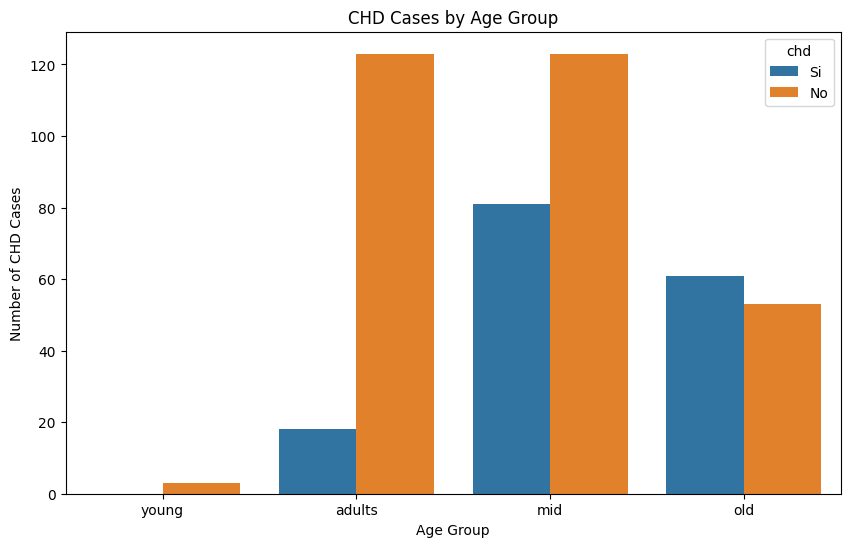

In [69]:
# 7.	Find out the number of CHD cases in different age categories. Do a bar plot and sort them in the order of age groups.
plt.figure(figsize=(10, 6))
sns.countplot(x='agegroup', hue='chd', data=df)
plt.title('CHD Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of CHD Cases')
plt.show()

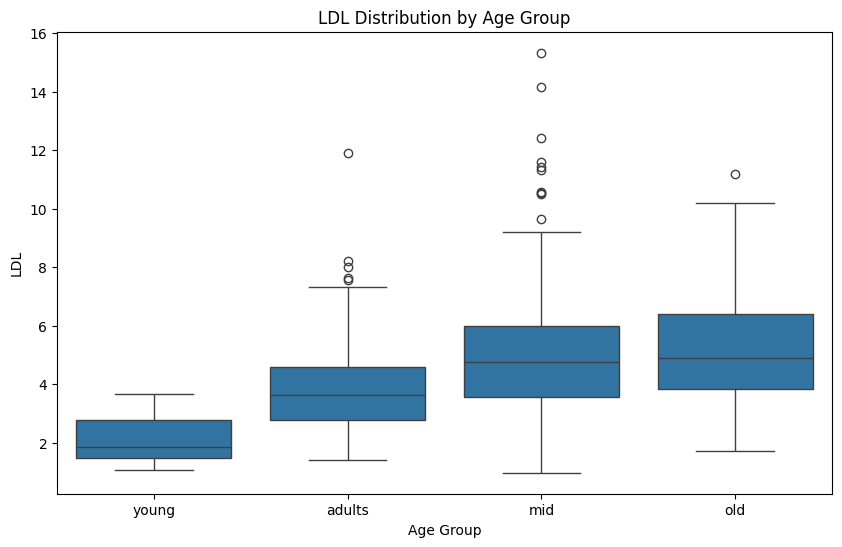

In [70]:
# 8.	Draw a box plot to compare distributions of ldl for different age groups.
plt.figure(figsize=(10, 6))
sns.boxplot(x='agegroup', y='ldl', data=df)
plt.title('LDL Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('LDL')
plt.show()